In [3]:
# read in the analysis data from pickle file
import pickle

from criteria.criteria_analysis import took_advice

file_path = 'criteria.pkl'
with open(file_path, 'rb') as infile:
    criteria = pickle.load(infile)

In [5]:
# read the criteria1 dictionary from criteria.pkl
correct_incorrect_count_dict = criteria['criteria1']
print(f"total number of subjects: {len(correct_incorrect_count_dict)}")
for subject, correct_incorrect_count in correct_incorrect_count_dict.items():
    total_trails = correct_incorrect_count['correct'] + correct_incorrect_count['incorrect']
    if total_trails != 360:
        print(f"subject {subject} has total trails not equal to 360")


total number of subjects: 652


mean of correct trials: 223.25766871165644 std of correct trials: 344.4980240129474
max of correct trials: 274, percentage: 0.7611111111111111
min of correct trials: 166, percentage: 0.46111111111111114


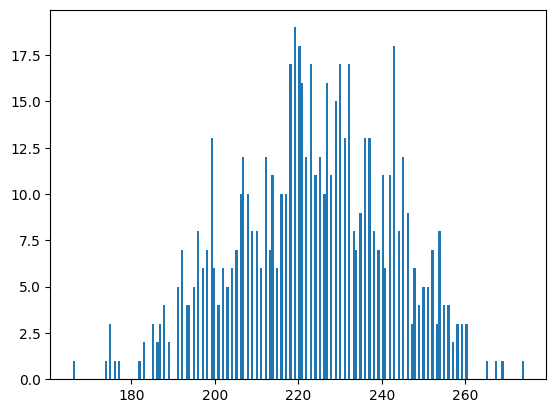

In [15]:
# draw a histogram of the number of correct trials for each subject
import matplotlib.pyplot as plt

correct_trials = [correct_incorrect_count_dict[subject]['correct'] for subject in correct_incorrect_count_dict]
plt.hist(correct_trials, bins=200)
print(f"mean of correct trials: {sum(correct_trials)/len(correct_trials)}", f"std of correct trials: {sum([(x - sum(correct_trials)/len(correct_trials))**2 for x in correct_trials])/len(correct_trials)}")
print(f"max of correct trials: {max(correct_trials)}, percentage: {max(correct_trials)/360}")
print(f"min of correct trials: {min(correct_trials)}, percentage: {min(correct_trials)/360}")

In [17]:
left_right_response_dict = criteria['criteria2']
print(f"total number of subjects: {len(left_right_response_dict)}")
for subject, left_right_response in left_right_response_dict.items():
    total_trails = left_right_response['left'] + left_right_response['right']
    if total_trails != 360:
        print(f"subject {subject} has total trails not equal to 360")

total number of subjects: 652


mean of left responses: 170.25766871165644 std of left responses: 489.1237908841131
max of left responses: 360, percentage: 1.0
min of left responses: 1, percentage: 0.002777777777777778
mean of right responses: 189.74233128834356 std of right responses: 489.1237908841131
max of right responses: 359, percentage: 0.9972222222222222
min of right responses: 0, percentage: 0.0


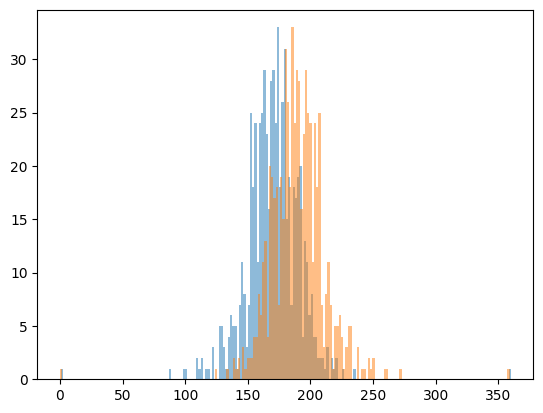

In [19]:
# plot the number of left and right responses for each subject
left_responses = [left_right_response_dict[subject]['left'] for subject in left_right_response_dict]
right_responses = [left_right_response_dict[subject]['right'] for subject in left_right_response_dict]
plt.hist(left_responses, bins=200, alpha=0.5, label='left')
plt.hist(right_responses, bins=200, alpha=0.5, label='right')

print(f"mean of left responses: {sum(left_responses)/len(left_responses)}", f"std of left responses: {sum([(x - sum(left_responses)/len(left_responses))**2 for x in left_responses])/len(left_responses)}")
print(f"max of left responses: {max(left_responses)}, percentage: {max(left_responses)/360}")
print(f"min of left responses: {min(left_responses)}, percentage: {min(left_responses)/360}")

print(f"mean of right responses: {sum(right_responses)/len(right_responses)}", f"std of right responses: {sum([(x - sum(right_responses)/len(right_responses))**2 for x in right_responses])/len(right_responses)}")
print(f"max of right responses: {max(right_responses)}, percentage: {max(right_responses)/360}")
print(f"min of right responses: {min(right_responses)}, percentage: {min(right_responses)/360}")


total number of subjects: 652
mean of reaction time: 1.156264349011611 std of reaction time: 0.34424579965311936
max of reaction time: 5.594070833333983
min of reaction time: 0.27430777777706833


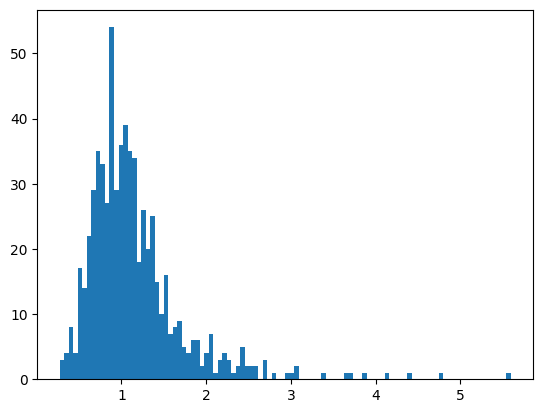

In [30]:
reaction_time_dict = criteria['criteria3']
print(f"total number of subjects: {len(reaction_time_dict)}")

avg_rt = [reaction_time_dict[subject]['average_reaction_time'] for subject in reaction_time_dict]
plt.hist(avg_rt, bins=100)
print(f"mean of reaction time: {sum(avg_rt)/len(avg_rt)}", f"std of reaction time: {sum([(x - sum(avg_rt)/len(avg_rt))**2 for x in avg_rt])/len(avg_rt)}")
print(f"max of reaction time: {max(avg_rt)}")
print(f"min of reaction time: {min(avg_rt)}")


total number of subjects: 652
mean of took advice: 128.75 std of took advice: 8139.325536809816
max of took advice: 360
min of took advice: 0


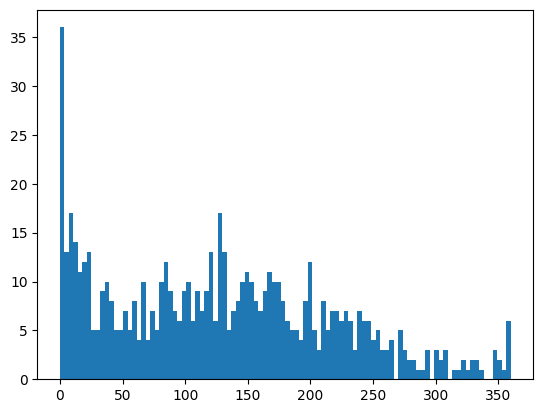

In [29]:
took_advice_dict = criteria['criteria4']
print(f"total number of subjects: {len(took_advice_dict)}")

took_advice = [took_advice_dict[subject] for subject in took_advice_dict]
plt.hist(took_advice, bins=100)
print(f"mean of took advice: {sum(took_advice)/len(took_advice)}", f"std of took advice: {sum([(x - sum(took_advice)/len(took_advice))**2 for x in took_advice])/len(took_advice)}")
print(f"max of took advice: {max(took_advice)}")
print(f"min of took advice: {min(took_advice)}")


total number of subjects: 652
mean of max break time: 21.364592791409244 std of max break time: 2172.9040089820496
max of max break time: 523.8592000000476
min of max break time: 3.4770000000000323


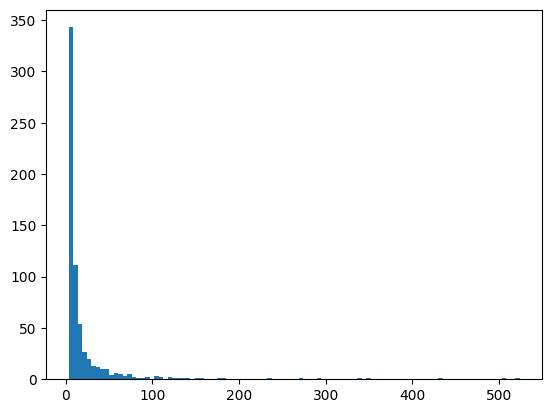

In [31]:
max_break_time_dict = criteria['criteria5']
print(f"total number of subjects: {len(max_break_time_dict)}")

max_break_time = [max_break_time_dict[subject] for subject in max_break_time_dict]
plt.hist(max_break_time, bins=100)
print(f"mean of max break time: {sum(max_break_time)/len(max_break_time)}", f"std of max break time: {sum([(x - sum(max_break_time)/len(max_break_time))**2 for x in max_break_time])/len(max_break_time)}")
print(f"max of max break time: {max(max_break_time)}")
print(f"min of max break time: {min(max_break_time)}")

mean of min rt: 0.16502070551896933 std of min rt: 0.01397809471004877
max of min rt: 1.0052000000473527
min of min rt: 0.004300000000739601


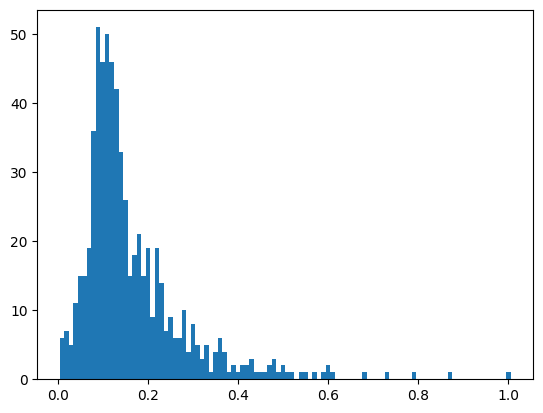

In [32]:
# find the min rt times for each subject
min_rt_dict = {}
for subject,val in reaction_time_dict.items():
    min_rt = float('inf')
    for rt in val['reaction_times']:
        if isinstance(rt, tuple):
            min_rt = min(min_rt, rt[0], rt[1])
        else:
            min_rt = min(min_rt, rt)
    min_rt_dict[subject] = min_rt

min_rt = [min_rt_dict[subject] for subject in min_rt_dict]
plt.hist(min_rt, bins=100)
print(f"mean of min rt: {sum(min_rt)/len(min_rt)}", f"std of min rt: {sum([(x - sum(min_rt)/len(min_rt))**2 for x in min_rt])/len(min_rt)}")
print(f"max of min rt: {max(min_rt)}")
print(f"min of min rt: {min(min_rt)}")